In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn.functional as F
import torchvision.transforms as transforms
#from torch.utils.data import DataLoader
#from models.data.datasets import ImgFlowOccFromFolder, MpiSintelClean, MpiSintelFinal
from models.data.utils.flow_utils import flow2img
from models.networks.lightning_datamodule import DatasetModule
from models.flow_model import FlowModel
import pytorch_lightning as pl
from models.data.utils.flow_utils import flow_error

In [2]:
root1 = r'/home/tnguyen/dataset/mpi-sintel/training'
data_module = DatasetModule(root = root1, batch_size=32, dataset_name = 'MpiSintelClean')
data_module.prepare_data()
data_module.setup()
dataloader = data_module.val_dataloader()

In [3]:
iteration = iter(dataloader)

In [4]:
imgs, flows = next(iteration)

In [5]:
flows.shape

torch.Size([32, 2, 384, 1024])

In [6]:
len(dataloader)

4

In [7]:
model =FlowModel.load_from_checkpoint('/home/tnguyen/OCFlow/lightning_logs/version_0/checkpoints/epoch=294.ckpt')

In [8]:
predicted_flows = model(imgs)

Text(0, 0.5, 'predicted flow')

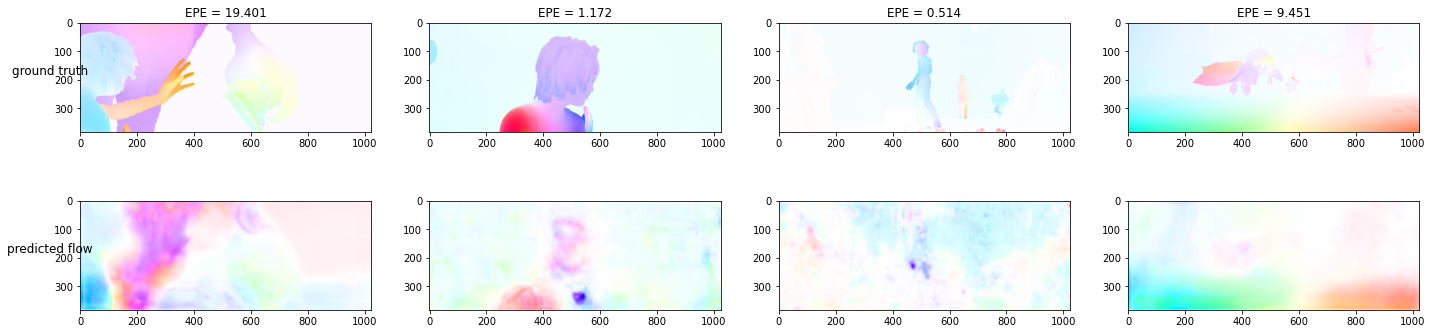

In [9]:
num = 4 #number of image flow display
fig, axes = plt.subplots(nrows=2, ncols=num, figsize=(24, 6))
for i in range(num):
    flow = flows[i].detach().cpu().numpy().transpose(1, 2, 0)

    predicted_flow = predicted_flows[i].detach().cpu().numpy().transpose(1, 2, 0)

    predicted_flow_img = flow2img(predicted_flow)
    flow_img = flow2img(flow)

    mepe = flow_error(flow[:,:,0], flow[:,:,1], predicted_flow[:,:,0], predicted_flow[:,:,1])

    axes[0,i].set_title('EPE = {:.3f}'.format(mepe))
    axes[0,i].imshow(flow_img)
    axes[1,i].imshow(predicted_flow_img)
axes[0,0].set_ylabel('ground truth', rotation=0, size='large')
axes[1,0].set_ylabel('predicted flow', rotation=0, size='large')



    



In [ ]:
trainer = pl.Trainer(max_epochs=600, gpus=1, resume_from_checkpoint='/home/tnguyen/OCFlow/lightning_logs/version_0/checkpoints/epoch=294.ckpt')
trainer.fit(model, datamodule = data_module)